In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('telco-customer-churn.csv', sep=',')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Tampilkan informasi dasar
print("Info Dataset:")
print(df.info())
print("\nContoh Data (5 baris pertama):")
print(df.head())
print("\nStatistik Deskriptif:")
print(df.describe())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())  # Cek ada berapa null setelah konversi

11


In [9]:
df = df.dropna(subset=['TotalCharges'])
print(df['TotalCharges'].isnull().sum())  # Cek ada berapa null setelah konversi

0


In [10]:
# Cek missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


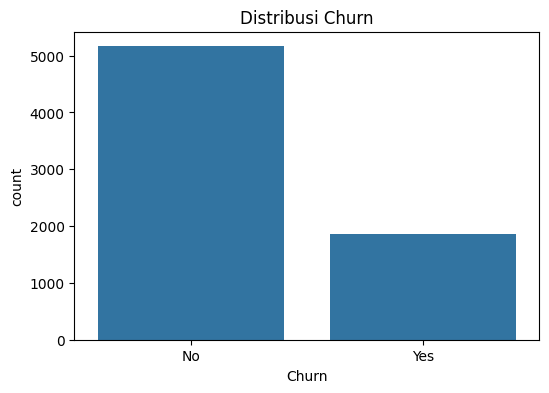

In [13]:
# Distribusi target (Churn)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn')
plt.show()

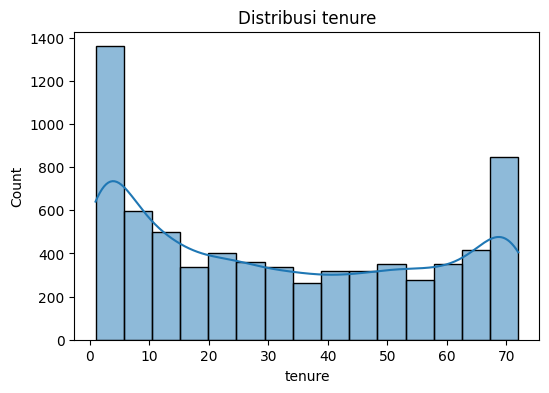

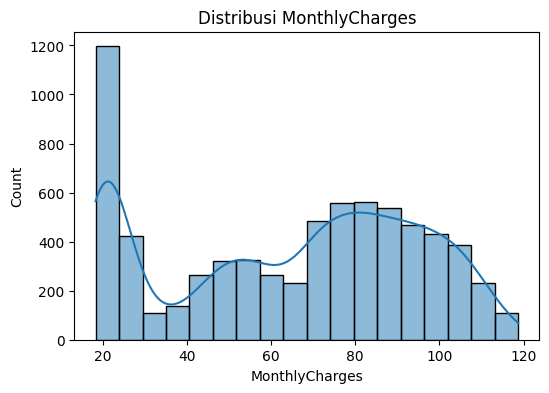

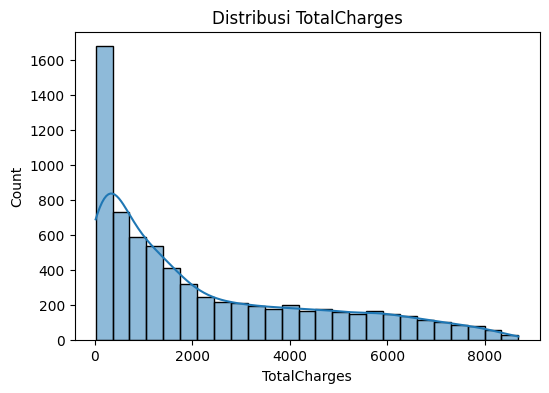

In [14]:
# Distribusi fitur numerik
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

**Data Cleaning dan Exploratory Data Analysis (EDA)**

In [15]:
# Drop kolom tidak relevan
df = df.drop('customerID', axis=1)

In [16]:
# Konversi target Churn ke biner (0/1)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

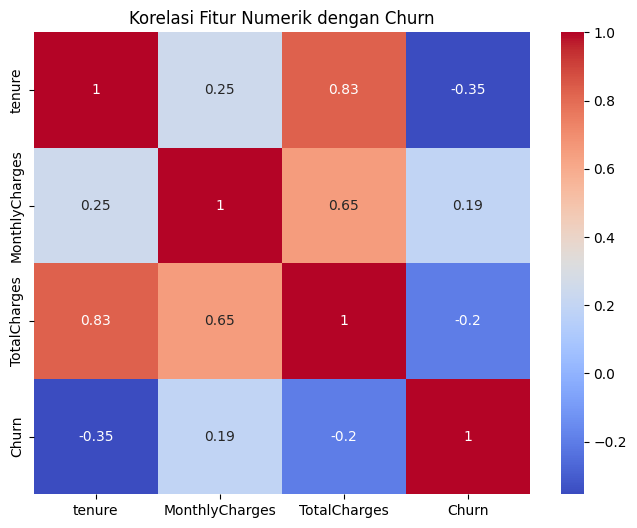

In [17]:
# EDA: Korelasi fitur numerik
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik dengan Churn')
plt.show()

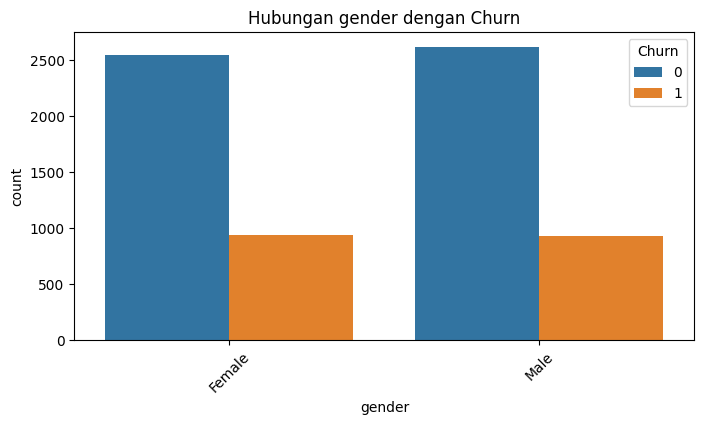

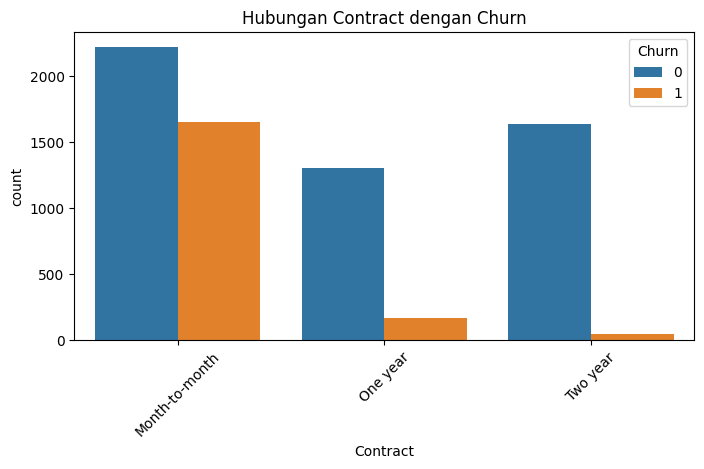

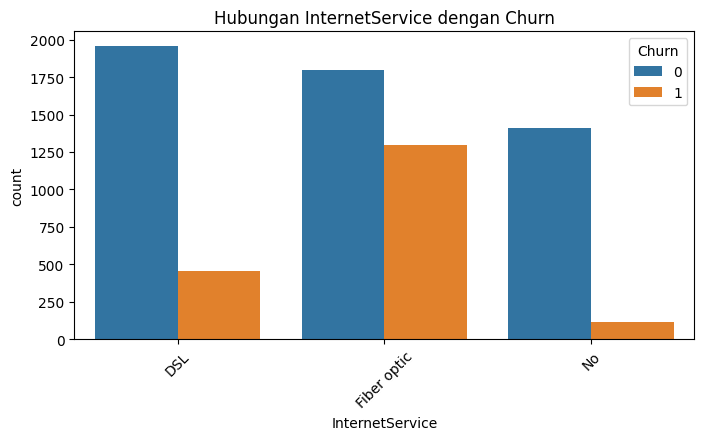

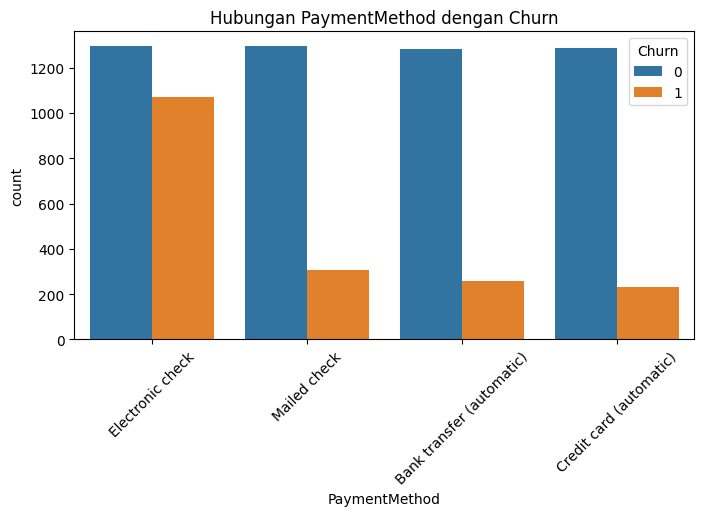

In [18]:
# EDA: Hubungan fitur kategorikal dengan Churn
categorical_cols = ['gender', 'Contract', 'InternetService', 'PaymentMethod']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Hubungan {col} dengan Churn')
    plt.xticks(rotation=45)
    plt.show()

In [19]:
# Simpan dataset yang sudah dibersihkan
df.to_csv('cleaned_telco_data.csv', index=False)

**Feature Engineering** \
Tujuan: Membuat fitur baru dan mempersiapkan data untuk modeling.

In [20]:
# Feature engineering: Buat fitur baru
df['AvgMonthlyCharges'] = df['TotalCharges'] / (df['tenure'] + 1)  # Hindari pembagian dengan 0

In [21]:
# One-Hot Encoding untuk fitur kategorikal
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [24]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Skalasi fitur numerik
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [25]:
# Simpan dataset yang sudah diproses
df.to_csv('processed_telco_data.csv', index=False)

**Modeling dengan PyCaret (Classification)** \
Tujuan: Membangun model klasifikasi menggunakan PyCaret untuk memprediksi churn.

In [26]:
from pycaret.classification import *
import pandas as pd

In [28]:
# Setup PyCaret
clf = setup(data=df, target='Churn', session_id=123, normalize=True,
            remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 32)"
4,Transformed data shape,"(7032, 25)"
5,Transformed train set shape,"(4922, 25)"
6,Transformed test set shape,"(2110, 25)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [29]:
# Bandingkan model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8025,0.8451,0.5535,0.6512,0.5979,0.4683,0.4713,0.8560
gbc,Gradient Boosting Classifier,0.8015,0.8471,0.5214,0.6615,0.5824,0.4547,0.4607,0.6540
ridge,Ridge Classifier,0.8009,0.8369,0.5222,0.6592,0.5823,0.4539,0.4595,0.0740
lda,Linear Discriminant Analysis,0.7993,0.8368,0.5574,0.6415,0.5962,0.4635,0.4658,0.1080
ada,Ada Boost Classifier,0.7991,0.8433,0.5260,0.6518,0.5815,0.4514,0.4563,0.2440
rf,Random Forest Classifier,0.7920,0.8211,0.4947,0.6401,0.5573,0.4245,0.4309,0.6590
lightgbm,Light Gradient Boosting Machine,0.7913,0.8307,0.5298,0.6287,0.5746,0.4377,0.4408,1.8060
xgboost,Extreme Gradient Boosting,0.7779,0.8182,0.5214,0.5955,0.5555,0.4084,0.4103,0.1710
et,Extra Trees Classifier,0.7767,0.7950,0.4747,0.6016,0.5299,0.3863,0.3914,0.5230
svm,SVM - Linear Kernel,0.7682,0.8165,0.5343,0.5745,0.5478,0.3936,0.3977,0.0870


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [30]:
# Latih model terbaik
final_model = finalize_model(best_model)

In [31]:
# Simpan model
save_model(final_model, 'best_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges',
                                              'AvgMonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Transf...
                  TransformerWrapper(exclude=None, include=None,
                     

**Hyperparameter Tuning** \
Tujuan: Mengoptimalkan performa model terbaik dengan tuning hyperparameter.

In [32]:
# Load model terbaik
model = load_model('best_churn_model')

Transformation Pipeline and Model Successfully Loaded


In [33]:
# Tuning hyperparameter
tuned_model = tune_model(model, optimize='F1', n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7241,0.8206,0.7328,0.4873,0.5854,0.3910,0.4093
1,0.7404,0.8304,0.7786,0.5075,0.6145,0.4316,0.4541
2,0.7724,0.8951,0.8923,0.5421,0.6744,0.5150,0.5528
3,0.7724,0.8558,0.8231,0.5459,0.6564,0.4965,0.5199
4,0.7337,0.8090,0.8092,0.5000,0.6181,0.4307,0.4601
5,0.7317,0.8419,0.8015,0.4976,0.6140,0.4252,0.4536
6,0.7541,0.8530,0.8550,0.5234,0.6493,0.4763,0.5104
7,0.7744,0.8614,0.8168,0.5515,0.6585,0.4993,0.5208
8,0.7520,0.8364,0.7710,0.5233,0.6235,0.4485,0.4672


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
# Simpan model yang sudah dituning
save_model(tuned_model, 'tuned_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges',
                                              'AvgMonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Transf...
                  TransformerWrapper(exclude=None, include=None,
                     

**Model Evaluation & Explainability** \
Tujuan: Mengevaluasi performa model dan menjelaskan prediksi menggunakan SHAP.

In [35]:
# Load model yang sudah dituning
model = load_model('tuned_churn_model')

Transformation Pipeline and Model Successfully Loaded


In [36]:
# Evaluasi model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
# Prediksi pada data training
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8076,0.8466,0.5348,0.6742,0.5964,0.4723,0.4778


In [64]:
# test_model.py

import pandas as pd
from pycaret.classification import load_model, predict_model
from sklearn.metrics import classification_report # Import classification_report explicitly

# Step 1: Load Model
model = load_model('tuned_churn_model')
print("✅ Model berhasil diload.")

# Step 2: Load Dataset untuk Testing
# (bisa pakai dataset baru atau dataset lama yang sudah diproses)
test_df = pd.read_csv('processed_telco_data.csv')

# Step 3: Prediksi
predictions = predict_model(model, data=test_df)

# Step 4: Simpan hasil prediksi ke CSV
predictions.to_csv('churn_predictions.csv', index=False)
print("✅ Prediksi selesai dan disimpan ke 'churn_predictions.csv'")

# Step 5: Cek performa ringkas (kalau ada kolom 'Churn' untuk validasi)
if 'Churn' in test_df.columns:
    y_true = test_df['Churn']
    # Use the predicted 'Label' column instead of the continuous 'prediction_score'
    y_pred = predictions['prediction_label']

    print("📊 Classification Report:")
    print(classification_report(y_true, y_pred))

# Optional: Lihat 10 prediksi pertama
print("\n🧪 Contoh hasil prediksi:")
print(predictions[['Churn', 'prediction_label', 'prediction_score']].head(10))

Transformation Pipeline and Model Successfully Loaded
✅ Model berhasil diload.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7510,0.8478,0.8031,0.5205,0.6316,0.4562,0.4807


✅ Prediksi selesai dan disimpan ke 'churn_predictions.csv'
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      5163
           1       0.52      0.80      0.63      1869

    accuracy                           0.75      7032
   macro avg       0.72      0.77      0.72      7032
weighted avg       0.81      0.75      0.76      7032


🧪 Contoh hasil prediksi:
   Churn  prediction_label  prediction_score
0      0                 1            0.8083
1      0                 0            0.8967
2      1                 1            0.5181
3      0                 0            0.9188
4      1                 1            0.8598
5      1                 1            0.9005
6      0                 1            0.7213
7      0                 1            0.5327
8      1                 1            0.7946
9      0                 0            0.9659
